In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from matplotlib.lines import Line2D
from salem import Map
from shapely.geometry import box, LineString

# Plot the study region 
Plot glaciers and the in situ measurements on the glaciers. Then plot the glaciers of the region as background and the test glaciers in color. 

In [2]:
# get the measurement data 
agg_measurementa= pd.read_csv('data/spitsbergen_measurements_aggregated_nosurges_dhdt2014smoothed_complete_moremeasurements.csv', low_memory=False)

In [3]:
# restrict to only data after 2000
after2000 = agg_measurementa[agg_measurementa.years>=2000]

In [4]:
# get data of the glacier grids without measurements
unlabeled_grid= pd.read_csv('data/spitsbergen/spitsbergen_allunmapped_griddeddata_nosurges_dhdt2014smoothed_complete.csv', low_memory=False)


In [5]:
unlabeled_grid.columns

Index(['Unnamed: 0', 'x', 'y', 'topo', 'topo_smoothed', 'topo_valid_mask',
       'glacier_mask', 'glacier_ext', 'consensus_ice_thickness', 'itslive_vx',
       'itslive_vy', 'itslive_v', 'millan_ice_thickness', 'millan_v',
       'millan_vx', 'millan_vy', 'hugonnet_dhdt', 'hugonnet_dhdt2014',
       'dhdt2014_smoothed', 'dhdt_smoothed', 'millan_vx_smoothed',
       'millan_vy_smoothed', 'millan_v_smoothed', 'glacier_ext_erosion',
       'ice_divides', 'slope', 'aspect', 'slope_factor', 'dis_from_border',
       'oggm_mb_on_z', 'RGI_ID', 'area', 'type', 'POINT_LON', 'POINT_LAT',
       'apparent_mb2014', 'beta_v', 'beta_vx', 'beta_vy'],
      dtype='object')

In [6]:
glaciergroups = unlabeled_grid.groupby('RGI_ID')

In [7]:
figsize = (8.3,9.6)
fontsize_small=14
fontsize_big = 20
fontsize_medium=18
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                 # '#999999', this is grey
                  '#e41a1c', '#dede00']
plt.style.use('default')

import the shapefile for the coastline of svalbard and clip it to the area of interest

In [8]:



# Read the coastline data
coastlines = gpd.read_file('data/svalbardcoastline/Coast2015.shp')
# Transform the coordinate system to EPSG:4326
coastlines = coastlines.to_crs(epsg=4326)

# Create a GeoDataFrame from your data points
gdf = gpd.GeoDataFrame(unlabeled_grid, geometry=gpd.points_from_xy(unlabeled_grid.POINT_LON, unlabeled_grid.POINT_LAT))

# Create a bounding box around your data points
bounds = gdf.geometry.total_bounds
bounding_box = gpd.GeoDataFrame(gpd.GeoSeries(box(*bounds)), columns=['geometry'])

# Clip the coastline data to the bounding box
coastlines_clipped = gpd.clip(coastlines, bounding_box)

# Create a line that connects the two points [20°E, 80°N] and [24°E, 78°N]
line = LineString([(20, 80), (24, 78)])

# Exclude all the coastlines that are east of this line
coastlines_clipped = coastlines_clipped[coastlines_clipped.geometry.apply(lambda x: not x.intersects(line))]


/home/unix_viola/miniconda3/envs/oggm_up_env/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/tmp/ipykernel_896/2552455067.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  coastlines_clipped = gpd.clip(coastlines, bounding_box)


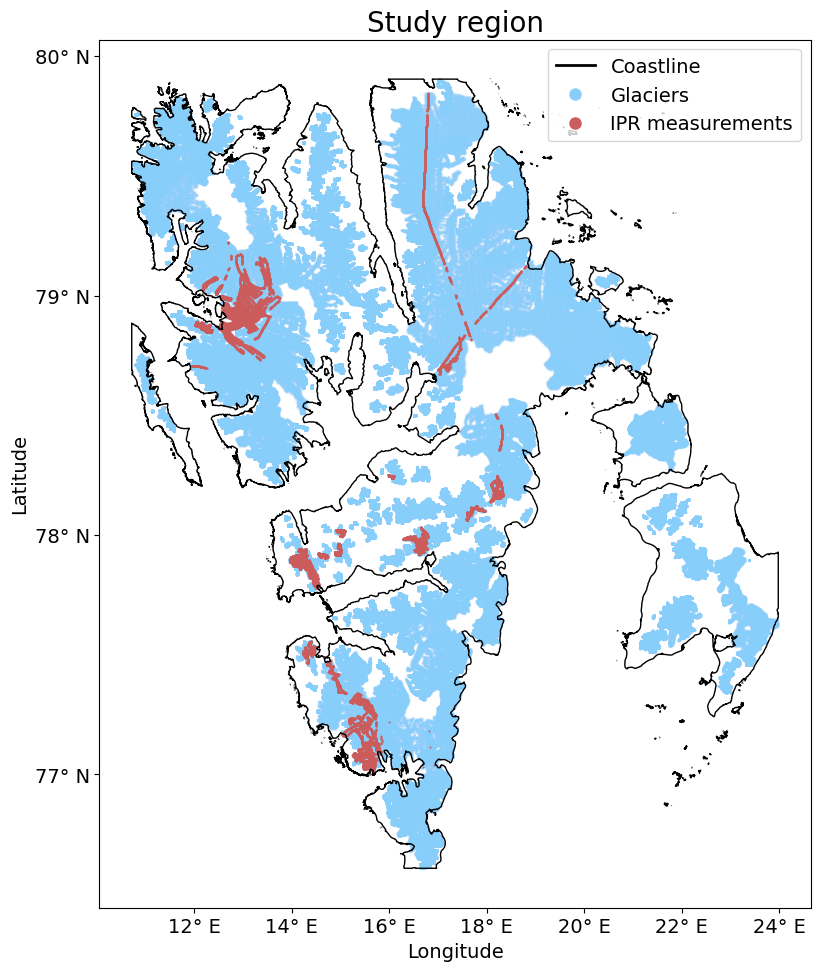

In [9]:


f, ax2 = plt.subplots(1, 1, figsize=figsize, layout='constrained')


ax2.set_title('Study region', fontsize=fontsize_big)
# Plot the data points
ax2.scatter(unlabeled_grid.POINT_LON, unlabeled_grid.POINT_LAT, marker='.', c='lightskyblue', s=1,alpha=0.1, label='Glaciers')
ax2.scatter(after2000.POINT_LON.values, after2000.POINT_LAT.values,marker='.',  s=1, c='indianred',label='IPR measurements')
# Plot the clipped coastlines
coastlines_clipped.plot(ax=ax2, edgecolor='black', facecolor='none', lw=1, label='Coastline')

ax2.set_xlabel('Longitude', fontsize=fontsize_small)
ax2.set_ylabel('Latitude', fontsize=fontsize_small)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%d° E'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d° N'))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=4))

ax2.tick_params(axis='both', which='both', labelsize=fontsize_small)
# patch1 = mpatches.Patch(edgecolor='black', facecolor='none', label='Coastline')
# patch2 = mpatches.Patch(edgecolor='lightskyblue', facecolor='lightskyblue', label='Glaciers')
# patch3 = mpatches.Patch(edgecolor='indianred', facecolor='indianred', label='IPR measurements')

#Prepare the legend
# Create a line for the coastline to display it in the legend
patch1 = Line2D([0], [0], color='black', lw=2, label='Coastline')
# Create filled circles for the other two
patch2 = Line2D([0], [0], marker='.', color='w', label='Glaciers',
                          markerfacecolor='lightskyblue', markersize=1)
patch3 = Line2D([0], [0], marker='.', color='w', label='IPR measurements',
                          markerfacecolor='indianred', markersize=1)


ax2.legend(markerscale=20, fontsize=fontsize_small, handles=[patch1, patch2, patch3])


#plt.savefig('results/gpr_measurements.png', dpi=300, bbox_inches='tight')

plt.show()

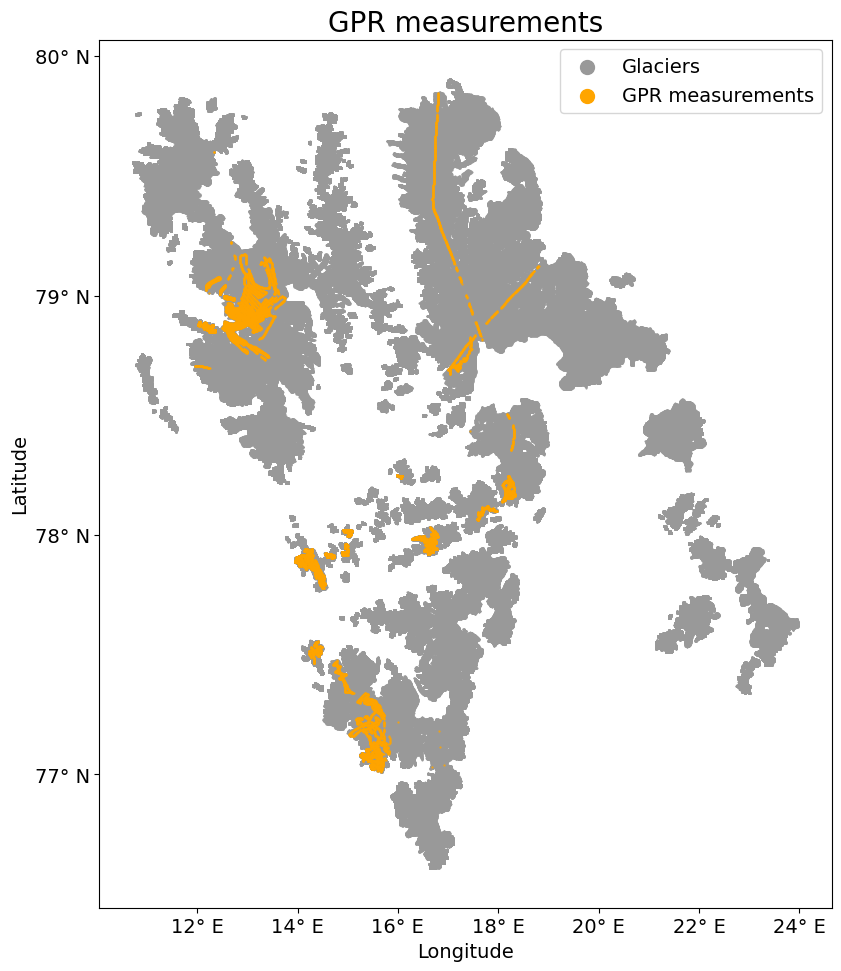

In [12]:

f, ax2 = plt.subplots(1, 1, figsize=figsize, layout='constrained')#


ax2.set_title('GPR measurements', fontsize=fontsize_big)
ax2.scatter(unlabeled_grid.POINT_LON, unlabeled_grid.POINT_LAT, marker='.', c='#999999',   s=1, label='Glaciers')

ax2.scatter(after2000.POINT_LON.values, after2000.POINT_LAT.values,marker='.',  s=1, c='orange',label='GPR measurements')

ax2.xaxis.set_major_formatter(FormatStrFormatter('%d° E'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d° N'))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=4))
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12)
ax2.tick_params(axis='both', which='both', labelsize=fontsize_small)

ax2.legend(markerscale=20, fontsize=fontsize_small)
ax2.set_xlabel('Longitude', fontsize=fontsize_small)
ax2.set_ylabel('Latitude', fontsize=fontsize_small)

sm = Map(g.grid, factor=1, countries=True)
sm.set_lonlat_contours(yinterval=1, xinterval=2, linewidths=0.5, linestyles='--', colors='gray')

sm.visualize(ax=ax2) 

plt.savefig('results/spitsbergen_gpr_measurements.png', dpi=300)
plt.show()
plt.close()

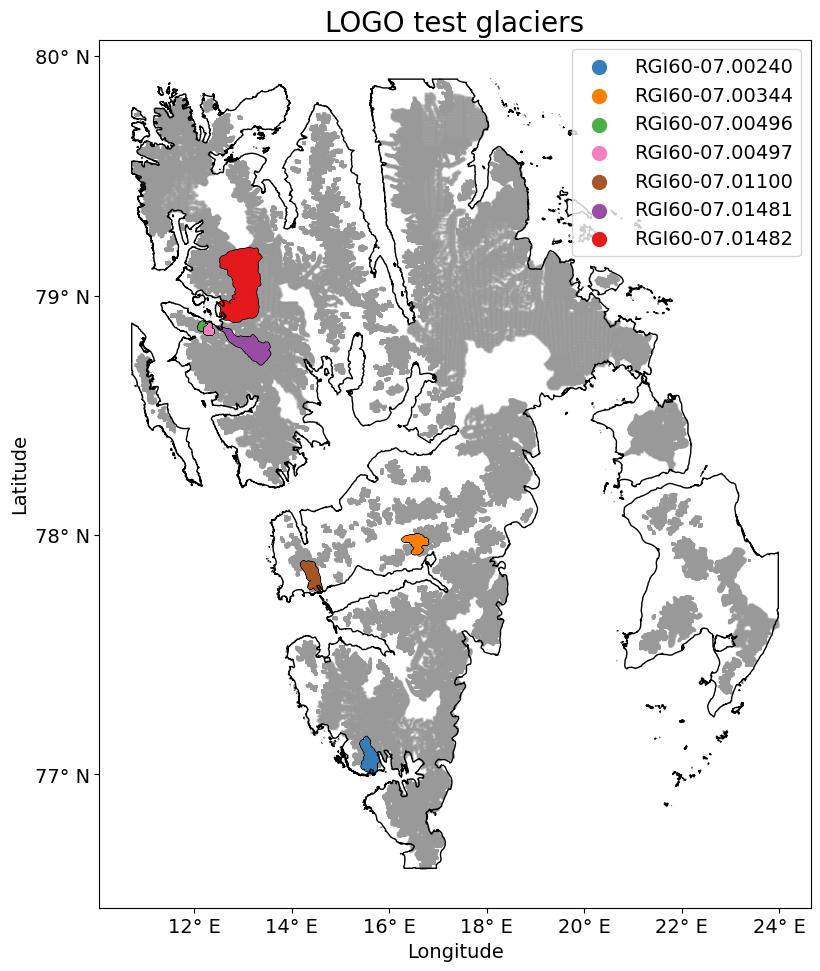

In [19]:

f, ax1 = plt.subplots(1, 1, figsize=figsize, layout='constrained')#


ax1.set_title('LOGO test glaciers', fontsize=fontsize_big)
ax1.scatter(unlabeled_grid.POINT_LON, unlabeled_grid.POINT_LAT, marker='.', c='#999999',  alpha=0.1,  s=1)

for c, rgi in enumerate(['RGI60-07.00240','RGI60-07.00344','RGI60-07.00496','RGI60-07.00497', 'RGI60-07.01100','RGI60-07.01481','RGI60-07.01482']):
    rgi_g=glaciergroups.get_group(rgi)
    
    ax1.scatter(rgi_g.POINT_LON.values, rgi_g.POINT_LAT.values, marker='.', c='black', s=10,)
    ax1.scatter(rgi_g.POINT_LON.values, rgi_g.POINT_LAT.values, marker='.', c=CB_color_cycle[c], label=rgi,s=1,)
coastlines_clipped.plot(ax=ax1, edgecolor='black', facecolor='none', lw=1)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d° E'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d° N'))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=4))

ax1.tick_params(axis='both', which='both', labelsize=fontsize_small)

ax1.legend(markerscale=20, fontsize=fontsize_small)
ax1.set_xlabel('Longitude', fontsize=fontsize_small)
ax1.set_ylabel('Latitude', fontsize=fontsize_small)

plt.savefig('results/spitsbergen_logo_glaciers_withcoast.png', dpi=300)
plt.show()
plt.close()

In [67]:
after2000.THICKNESS.describe()

count    27907.000000
mean       164.943043
std        129.974108
min          0.363636
25%         66.845238
50%        130.250000
75%        228.500000
max        733.000000
Name: THICKNESS, dtype: float64

In [66]:
after2000.THICKNESS_UNCERTAINTY.describe()

count    26638.000000
mean         5.468641
std          4.172563
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         21.000000
Name: THICKNESS_UNCERTAINTY, dtype: float64

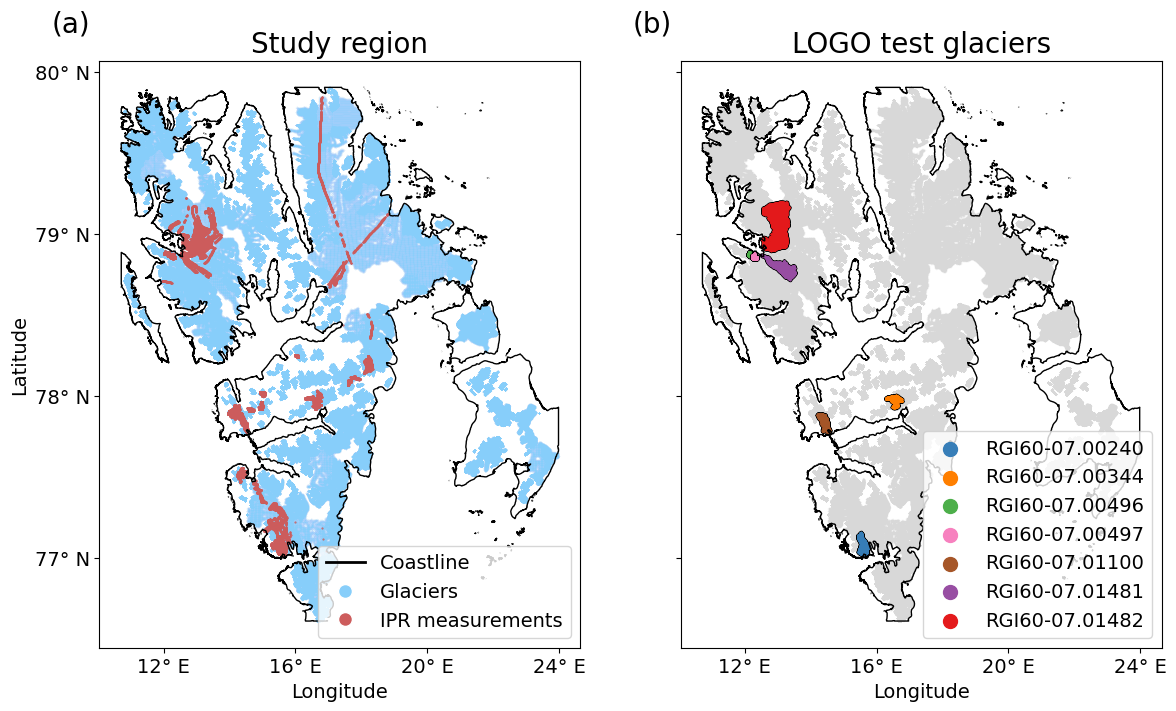

In [28]:
f, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 7), sharey=True, layout='constrained')


ax2.set_title('Study region', fontsize=fontsize_big)
# Plot the data points
ax2.scatter(unlabeled_grid.POINT_LON, unlabeled_grid.POINT_LAT, marker='.', c='lightskyblue', s=0.1,alpha=0.1, label='Glaciers')
ax2.scatter(after2000.POINT_LON.values, after2000.POINT_LAT.values,marker='.',  s=1, c='indianred',label='IPR measurements')
# Plot the clipped coastlines
coastlines_clipped.plot(ax=ax2, edgecolor='black', facecolor='none', lw=1, label='Coastline')

ax2.set_xlabel('Longitude', fontsize=fontsize_small)
ax2.set_ylabel('Latitude', fontsize=fontsize_small)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%d° E'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d° N'))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax2.tick_params(axis='both', which='both', labelsize=fontsize_small)
# patch1 = mpatches.Patch(edgecolor='black', facecolor='none', label='Coastline')
# patch2 = mpatches.Patch(edgecolor='lightskyblue', facecolor='lightskyblue', label='Glaciers')
# patch3 = mpatches.Patch(edgecolor='indianred', facecolor='indianred', label='IPR measurements')

#Prepare the legend
# Create a line for the coastline to display it in the legend
patch1 = Line2D([0], [0], color='black', lw=2, label='Coastline')
# Create filled circles for the other two
patch2 = Line2D([0], [0], marker='.', color='w', label='Glaciers',
                          markerfacecolor='lightskyblue', markersize=1)
patch3 = Line2D([0], [0], marker='.', color='w', label='IPR measurements',
                          markerfacecolor='indianred', markersize=1)


ax2.legend(markerscale=20, fontsize=fontsize_small, handles=[patch1, patch2, patch3], loc='lower right')
ax2.text(-0.1, 1.05, '(a)', fontsize=fontsize_big, transform=ax2.transAxes)




ax1.set_title('LOGO test glaciers', fontsize=fontsize_big)
ax1.scatter(unlabeled_grid.POINT_LON, unlabeled_grid.POINT_LAT, marker='.', c='#d8d8d8',  alpha=0.1,  s=0.1)

for c, rgi in enumerate(['RGI60-07.00240','RGI60-07.00344','RGI60-07.00496','RGI60-07.00497', 'RGI60-07.01100','RGI60-07.01481','RGI60-07.01482']):
    rgi_g=glaciergroups.get_group(rgi)
    
    ax1.scatter(rgi_g.POINT_LON.values, rgi_g.POINT_LAT.values, marker='.', c='black', s=10,)
    ax1.scatter(rgi_g.POINT_LON.values, rgi_g.POINT_LAT.values, marker='.', c=CB_color_cycle[c], label=rgi,s=1,)
coastlines_clipped.plot(ax=ax1, edgecolor='black', facecolor='none', lw=1)

# ax1.set_ylabel('')
# ax1.set_yticklabels([])
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d° E'))
# ax1.yaxis.set_major_formatter(FormatStrFormatter('%d° N'))
ax1.xaxis.set_major_locator(MaxNLocator(nbins=4))


ax1.tick_params(axis='both', which='both', labelsize=fontsize_small)

ax1.legend(markerscale=20, fontsize=fontsize_small, loc='lower right')
ax1.set_xlabel('Longitude', fontsize=fontsize_small)
# ax1.set_ylabel('Latitude', fontsize=fontsize_small)
ax1.text(-0.1, 1.05, '(b)', fontsize=fontsize_big, transform=ax1.transAxes)

plt.savefig('results/spitsbergen_gpr_and_logo_glaciers_withcoast.png', dpi=300)
plt.show()
plt.close()